In [17]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display



In [18]:
from sklearn import tree
from IPython.display import Image


def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors, light_colors):
    
    #fit model
    cls=estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (10, 5))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = light_colors)
   
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors, edgecolors=['black'])
    plt.title('Train data, accuracy={:.2f}'.format(estimator.score(train_data,train_labels)))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)

    plt.contourf(xx, yy, Z, cmap = light_colors)

    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors, edgecolors=['black'])
    plt.title('Test data, accuracy={:.2f}'.format(estimator.score(test_data,test_labels)))
    plt.show()
# Если не работает GraphViz
#     tree.plot_tree(estimator)
#     plt.show()

# Если не работает GraphViz установили
    dot_data = tree.export_graphviz(estimator, out_file=None, 
                     feature_names=['x1','x2'],  
                     class_names=['red', 'blue', 'yellow'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
    graph = graphviz.Source(dot_data)  
    display(graph) 
    return

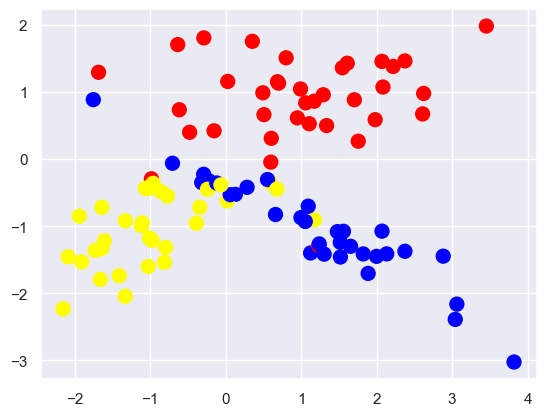

In [19]:
from sklearn import datasets

X, y = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
plt.scatter( X[:,0], X[:,1], c=y, cmap=colors, s=100);

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [21]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [22]:
from sklearn import tree
from sklearn.tree import export_graphviz
#import pydotplus
from IPython.display import Image


def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors, light_colors):
    
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (10, 5))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = light_colors)
   
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors, edgecolors=['black'])
    plt.title('Train data, accuracy={:.2f}'.format(estimator.score(train_data,train_labels)))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)

    plt.contourf(xx, yy, Z, cmap = light_colors)

    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors, edgecolors=['black'])
    plt.title('Test data, accuracy={:.2f}'.format(estimator.score(test_data,test_labels)))
    plt.show()
    return

## Случайный лес

Случайный лес — один из самых удачных алгоритмов машинного обучения, придуманные Лео Брейманом и Адель Катлер ещё в прошлом веке. Он дошёл до нас в «первозданном виде» (никакие эвристики не смогли его существенно улучшить) и является одним из немногих универсальных алгоритмов. 

Универсальность заключается, во-первых, в том, что он хорош в подавляющей большинстве задач, если не учитывать задачи с изображениями, во-вторых, в том, что есть случайные леса для решения задач классификации, регрессии, кластеризации, поиска аномалий, селекции признаков и т.д.

Случайный лес это универсальный боец из арсенала ML.

### Как построить лес

Для построения леса нам нужны различные деревья построенные на общих данных, но у нас получатся клоны ... 
Как же это избежать:

1. Использовать бутстрап (отбираем строки из исходного набора с возвратом) для отбора строк с данными для построения одного дерева и повторить как можно больше раз.
2. Агрегировать бутстрапы (бэггинг) и получить ответы - для классификации по большинству, для регрессии среднее арифметическое.

Как дополнительно услилть различие в деревьях:
1. Использовать случайный набор признаков для построения расшепления внутри каждого дерева на каждом шаге
2. Использовать прунинг (стрижку) - кстати не слишеом эффективное решение в 90% случаев ...

Модель строит рейтинг своих признаков.

Модель позволяет оценить уверенность в ответе - дисперсия ответов деревьев.

Модель позволяет автоматический котроль результатов  обучения из-за бутстрапа - OOB (out of bag), кросвалидация нужна ли ты?

<img src="Pict/forest_oob.png" width="600"/>

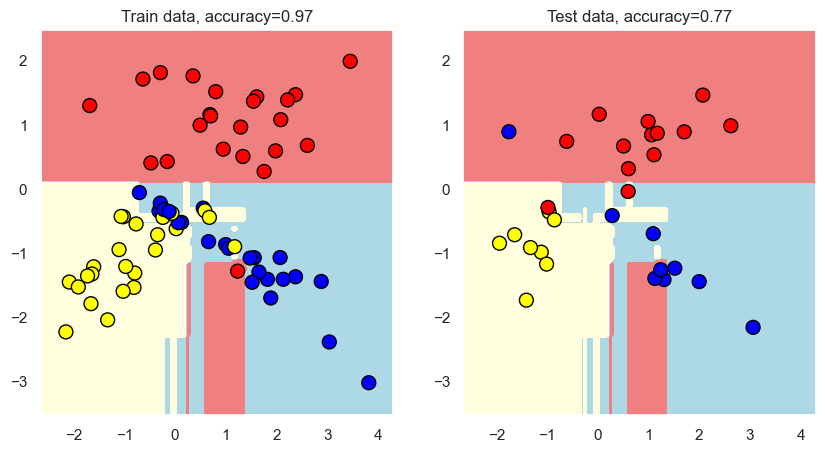

In [23]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=5, random_state=2)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

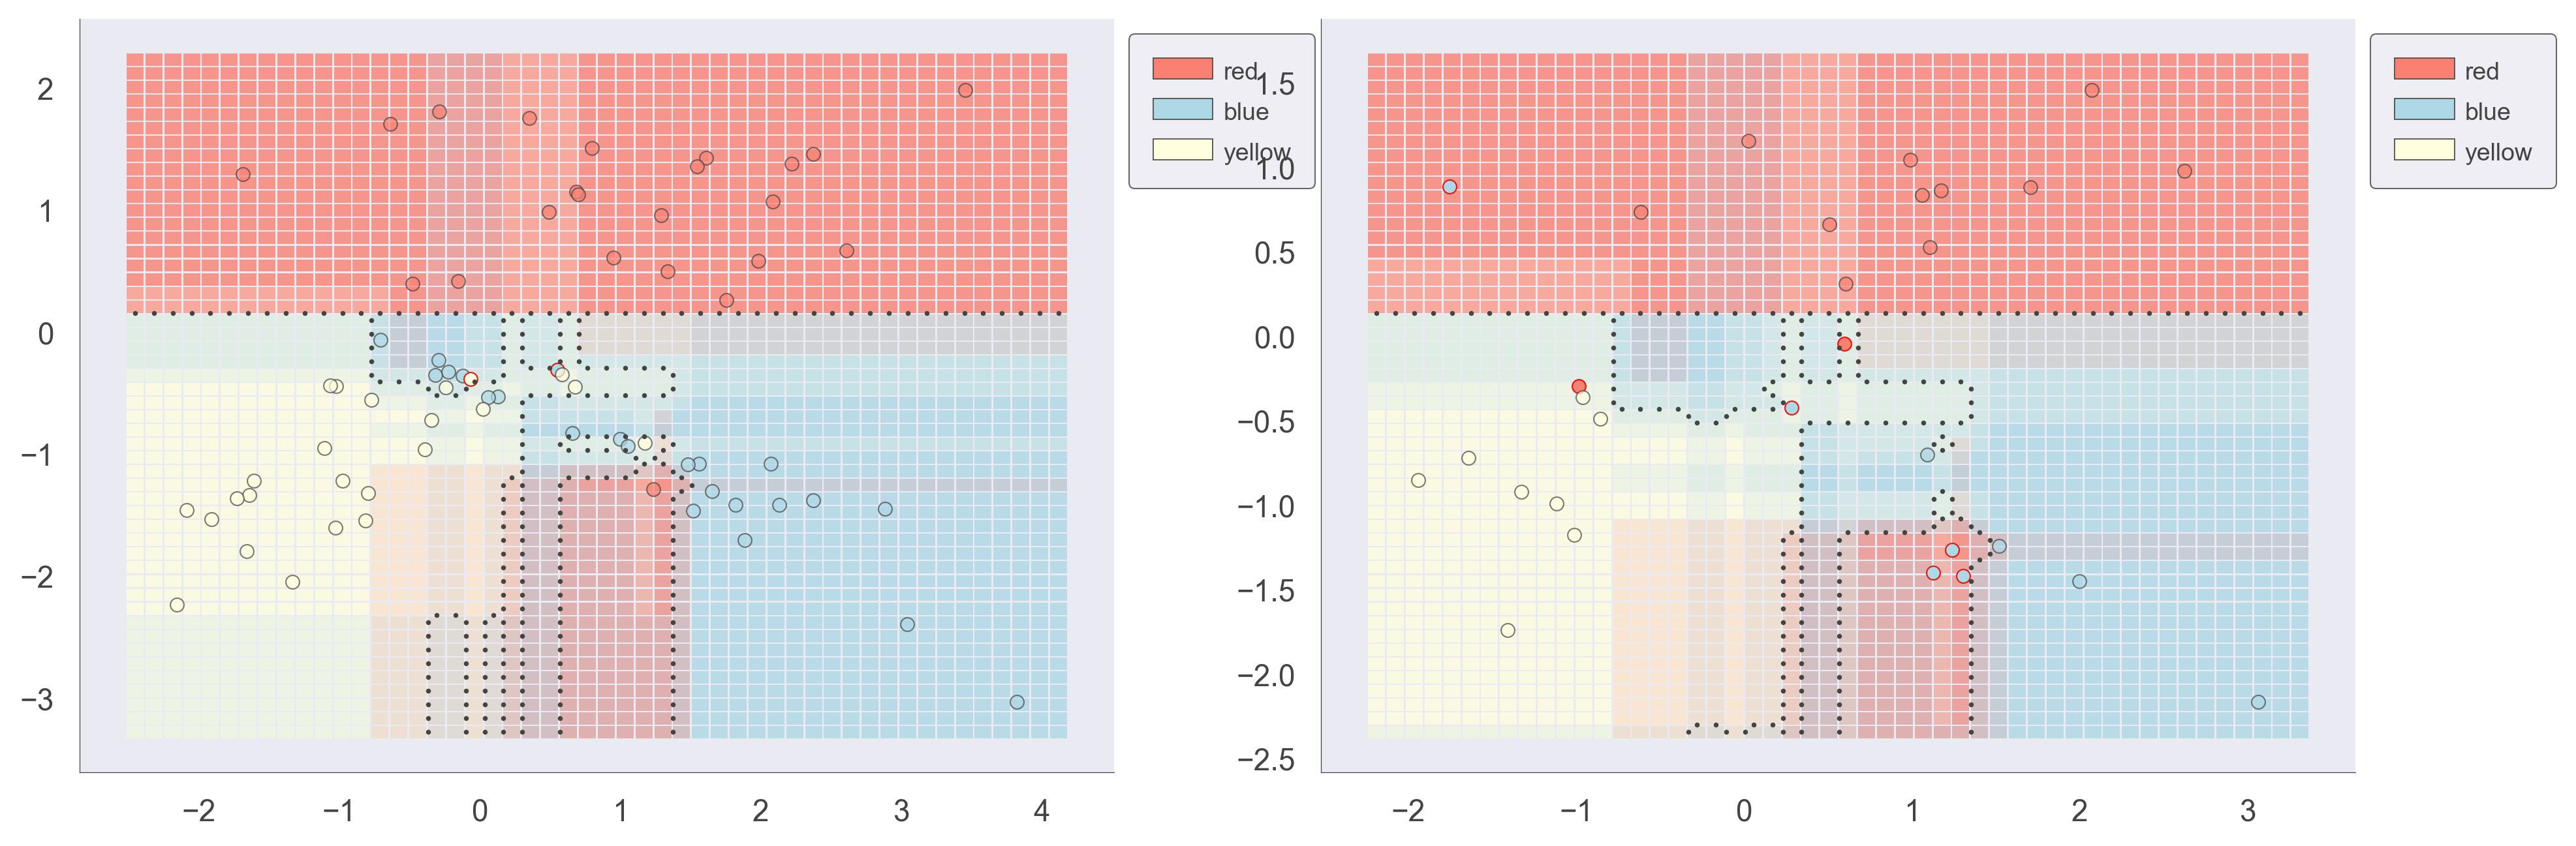

In [24]:
# pip install dtreeviz
import dtreeviz


fig,axes = plt.subplots(1,2,  figsize=(15,5), dpi=300)
dtreeviz.decision_boundaries(
        estimator, X_train, y_train, ax=axes[0],
        class_names=['red', 'blue', 'yellow'],
        colors = { 'classes':  
           [None,  # 0 classes
            None,  # 1 class
            None,  # 2 classes
            ['salmon','lightblue','lightyellow']
                  ]})
dtreeviz.decision_boundaries(
        estimator, X_test, y_test, ax=axes[1],
        class_names=['red', 'blue', 'yellow'],
        colors = { 'classes':  
           [None,  # 0 classes
            None,  # 1 class
            None,  # 2 classes
            ['salmon','lightblue','lightyellow']
                  ]})

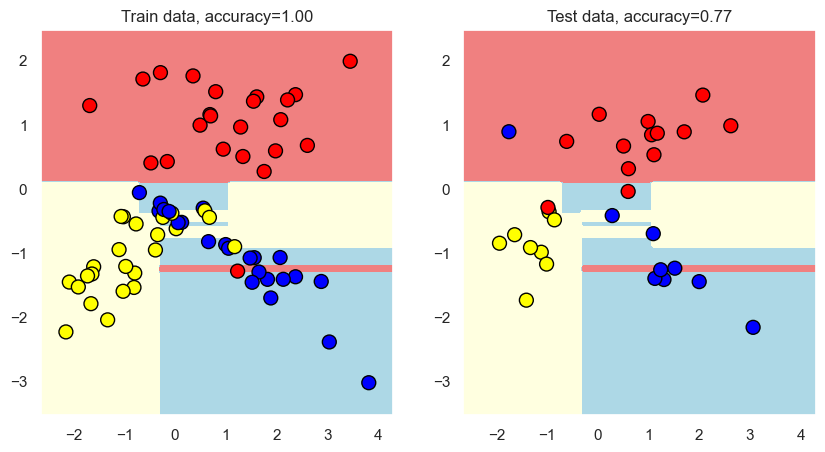

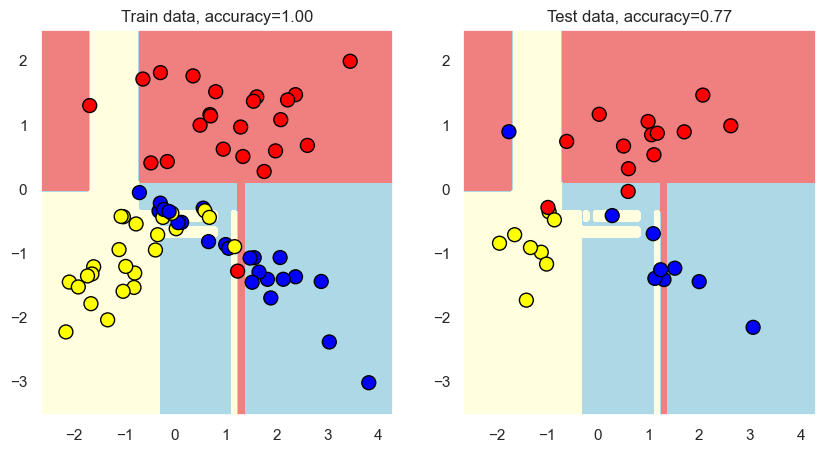

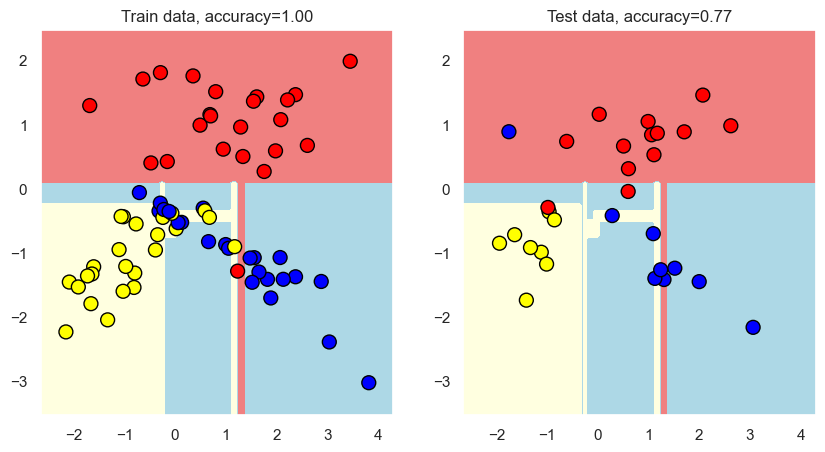

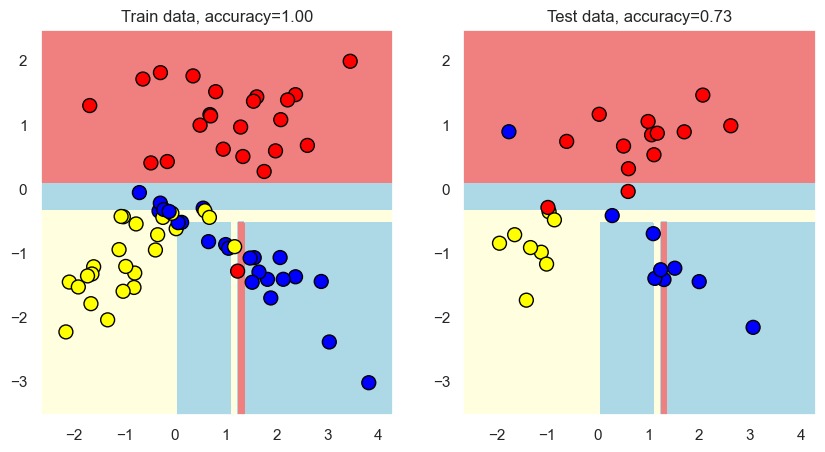

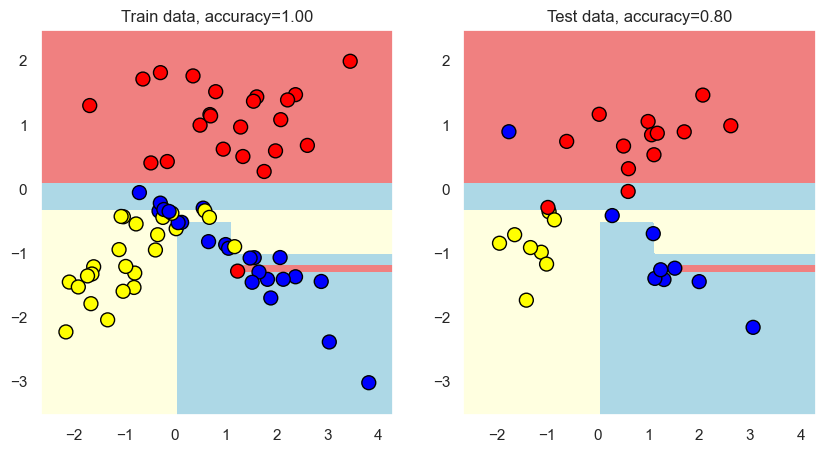

In [25]:
for i in range( len(estimator.estimators_) ):
    plot_decision_surface(estimator.estimators_[i], X_train, y_train, X_test, y_test, colors, light_colors)


In [26]:
estimator.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1872583848),
 DecisionTreeClassifier(max_features='sqrt', random_state=794921487),
 DecisionTreeClassifier(max_features='sqrt', random_state=111352301),
 DecisionTreeClassifier(max_features='sqrt', random_state=1853453896),
 DecisionTreeClassifier(max_features='sqrt', random_state=213298710)]

## Давайте разберемся с параметрами

`RandomForestClassifier(`<br>
`n_estimators=100,`  - **число деревьев, чем больше тем лучше** ТОЛЬКО АЛЬТЕРНАТИВНО ОДАРЕННЫЙ ИЩЕТ ОПТИМУМ ПО ЧИСЛУ ДЕРЕВЬЕВ:)<br>
`criterion='gini'`, - критерий разбиения {“gini”, “entropy”, “log_loss”}, практически не влияет <br>
`max_depth=None`, лучше не трогать, опыт показывает, что к этому параметру не нужно относится как к регуляризации (иногда ограничение глубины позволяет бороться с выбросами, или слишком много деревьев для обработки)<br>
`min_samples_split=2`, - минимальная выборка для разбиения<br>
`min_samples_leaf=1`,  - минимальная выборка в листе<br>
`min_weight_fraction_leaf=0.0`, - гарантирует, что листы содержат по крайней мере часть общей суммы весов выборки (выборка должны быть сбалансирована, иначе будет крен по весам)<br>
`max_features='sqrt'`,  - **число признаков для разбиения**  {“sqrt”, “log2”, None} <br>
`max_leaf_nodes=None`, <br>
`min_impurity_decrease=0.0`, - порог измерения зашумленности данных, если рабиение не слишком меняет велечину критерия разбиянмя, то дальнейшее разбиение не происходит, интересен тем, что sklearn нормирован на количество строк попавших в выбоку, что позволяет вначле рабивать данные при плохом уменьшении критерия разбиения, а затем ниже останавливаться <br>
`bootstrap=True`, <br>
`oob_score=False`, <br>
`n_jobs=None`, **всегда ставим -1**<br>
`random_state=None`,<br> 
`verbose=0`, <br>
`warm_start=False`, - докинуть данных в сущесвующий лес и дообучить <br>
`class_weight=None`, - пербалансировка важности классов  <br>
`ccp_alpha=0.0`, <br>
`max_samples=None`) - максимум строк при влюченном бутстрапе<br>

In [27]:
rf_1= RandomForestClassifier(n_estimators=5, random_state=42)
rf_1.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_1.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_1.score(X_test, y_test)))
# мало деревьев в лесу

Правильность на обучающем наборе: 0.971
Правильность на тестовом наборе: 0.833


In [28]:
rf_2= RandomForestClassifier(n_estimators=500, max_features='sqrt',  random_state=42)
rf_2.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_2.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_2.score(X_test, y_test)))
# на тесте переобучились, но неплохо осреднились за счет семплирования

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.833


In [29]:
rf_3= RandomForestClassifier(n_estimators=500, min_samples_leaf = 5, max_features=None,  random_state=42)
rf_3.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_3.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_3.score(X_test, y_test)))
# на тесте остановильсь принудительно по глубине и неплохо осреднились, фичи не семплировали - их очень мало!

Правильность на обучающем наборе: 0.914
Правильность на тестовом наборе: 0.900


In [15]:
rf_4= RandomForestClassifier(n_estimators=500, max_features='sqrt', min_samples_leaf = 5,  random_state=42)
rf_4.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_4.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_4.score(X_test, y_test)))
# на тесте остановильсь вовремя и неплохо осреднились, но сэмплирование фич тут лишнее, фич мало...

Правильность на обучающем наборе: 0.914
Правильность на тестовом наборе: 0.900


In [31]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=10, random_state=0) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.951


In [16]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=1000, max_features='sqrt', min_samples_leaf = 5, random_state=0, 
                                oob_score = True) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(forest.oob_score_))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.981
Правильность на OOB: 0.958
Правильность на тестовом наборе: 0.972


In [17]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=1000, max_features=10, random_state=0,
                               oob_score = True) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(forest.oob_score_))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на OOB: 0.960
Правильность на тестовом наборе: 0.972


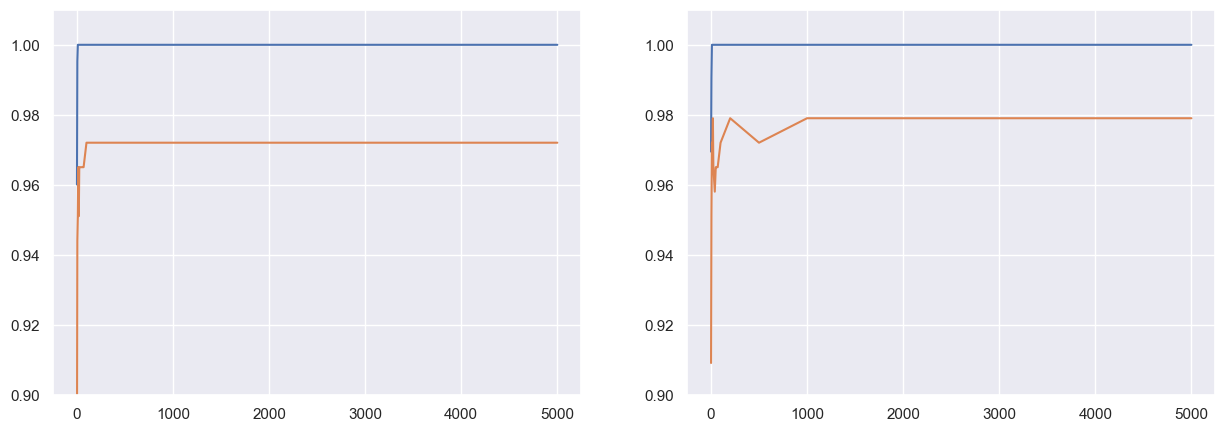

In [18]:
sc_train1 =[]
sc_test1 = []
sc_train2 =[]
sc_test2 = []
n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500, 1000, 5000]
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1)
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1, criterion= 'entropy')
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train2.append(sc_train_n)
    sc_test2.append(sc_test_n)    
    
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(n_estimators,sc_train1)
ax1.plot(n_estimators,sc_test1)
ax1.set_ylim(0.9, 1.01)
ax2.plot(n_estimators,sc_train2)
ax2.plot(n_estimators,sc_test2)
ax2.set_ylim(0.9, 1.01);

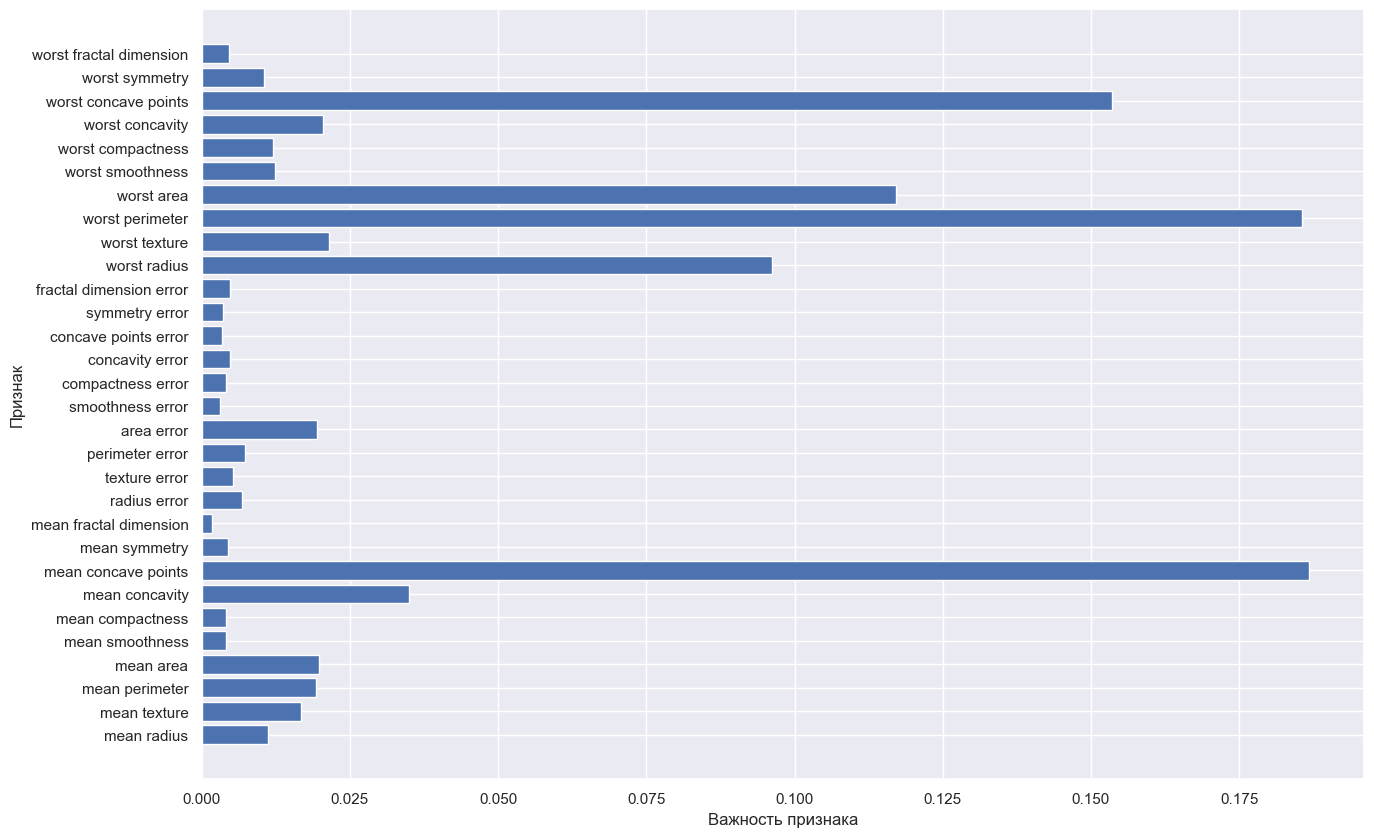

In [19]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plt.figure(figsize = (15, 10))
plot_feature_importances_cancer(forest)

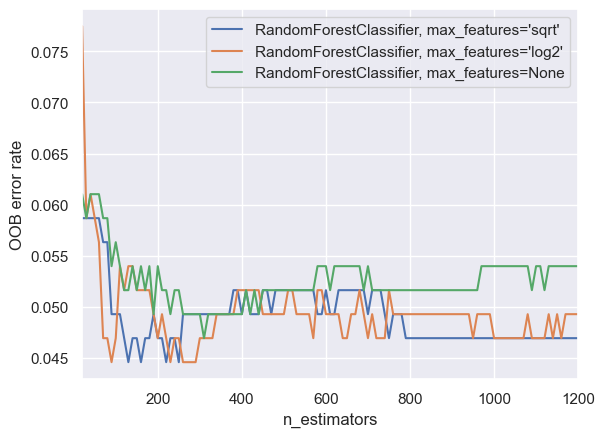

In [20]:
from collections import OrderedDict

RANDOM_STATE = 12
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            n_jobs = -1,
            min_samples_leaf = 5,
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            n_jobs = -1,
            warm_start=True,
            min_samples_leaf = 5,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            n_jobs = -1,
            min_samples_leaf = 5,
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Сопоставляем имя классификатора со списком пар (<n_estimators>, <коэффициент ошибок>).
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 20
max_estimators = 1200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 10):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Запишем ошибку OOB для каждой настройки `n_estimators=i`.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Создаем график «Коэффициент ошибок OOB» и график «n_estimators».
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [21]:
min_features = 1
max_features = cancer.data.shape[1]

ensemble_clfs = [
    (
        "RandomForestClassifier, gini",
        RandomForestClassifier(
            criterion='gini',
             min_samples_leaf = 5,
            n_jobs = -1,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, entropy",
        RandomForestClassifier(
            criterion='entropy',
             min_samples_leaf = 5,
            n_jobs = -1,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    )
]

# Сопоставляем имя классификатора со списком пар (<n_estimators>, <коэффициент ошибок>).
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, clf in ensemble_clfs:
    for i in range(min_features, max_features + 1):
        clf.set_params(n_estimators = 500, max_features = i)
        clf.fit(X_train, y_train)

        # Запишем ошибку OOB для каждой настройки `n_estimators=i`.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

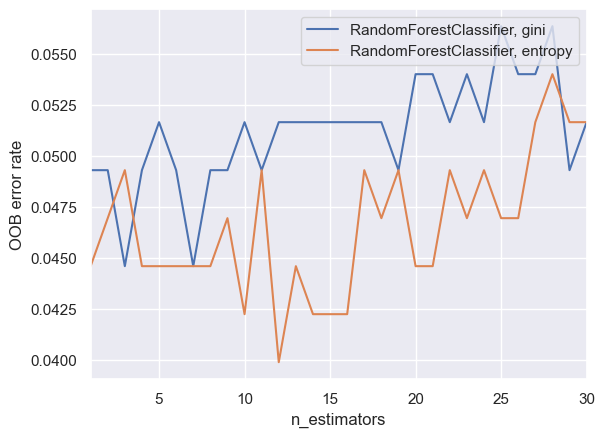

In [22]:
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_features, max_features)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(criterion='entropy', n_estimators=500, max_features=12,  min_samples_leaf = 5,
                               oob_score = True) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(forest.oob_score_))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на OOB: 0.955
Правильность на тестовом наборе: 0.986


In [33]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(criterion='entropy', n_estimators=500, max_features=2,  min_samples_leaf = 5,
                               oob_score = True) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(forest.oob_score_))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.986
Правильность на OOB: 0.960
Правильность на тестовом наборе: 0.965
